# Customer Churn Prediction

* Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Data Preparation

In [80]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Set the plot style
plt.style.use("tableau-colorblind10")

In [81]:
# read the data using pandas `read_csv` method.
data = pd.read_csv("data.csv")

In [82]:
# view first five rows
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [83]:
# Columns
print("Number of columns::", data.shape[1])
print("Columns::", data.columns.to_list())

Number of columns:: 21
Columns:: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [84]:
# change the column name case into lowercase and space with '_'.
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [85]:
# Change the string case of categorical variable values.
categorical_cols = data.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    data[col] = data[col].str.lower().str.replace(" ", "_")

In [86]:
# Let's check the data again
data.head(2).T

,0,1
customerid,7590-vhveg,5575-gnvde
gender,female,male
seniorcitizen,0,0
partner,yes,no
dependents,no,no
tenure,1,34
phoneservice,no,yes
multiplelines,no_phone_service,no
internetservice,dsl,dsl
onlinesecurity,no,yes


In [87]:
# datatypes
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [88]:
# Convert the `totalcharges` datatype form object to numerics
data['totalcharges'] = pd.to_numeric(data.totalcharges, errors='coerce')

# Fill the missing values in 'totalcharges' with value 0
data['totalcharges'] = data.totalcharges.fillna(value=0)

In [89]:
# Convert the `churn` datatype as well
data['churn'] = (data.churn =='yes').astype('int')

## Setting up validation framework
Splitting data into train/validation/test datasets using `train_test_split` method of `sklearn.model_selection` class.

In [90]:
from sklearn.model_selection import train_test_split

# Split the data into X and y.
X = data.drop(columns=['churn'], axis=1).copy()
y = data['churn'].copy()

# first split the data into ratio 80:20 for training and test dataset
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# next, split the data X_full and y_full into train, and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

In [91]:
print("X_train shape::", X_train.shape)
print("X_val shape::", X_val.shape)
print("X_test shape::", X_test.shape)

X_train shape:: (4225, 20)
X_val shape:: (1409, 20)
X_test shape:: (1409, 20)


In [92]:
# Reset the index
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


# Exploratory Data Analysis

In [93]:
# Check for missing values in data
X_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

There are no null values present in the data

In [94]:
# Churn value counts
y_full.value_counts()

0    4138
1    1496
Name: churn, dtype: int64

In [95]:
# Churn rate
global_churn = data['churn'].mean()
global_churn

0.2653698707936959

The instances for the customer who churns are 1496 which is almost only the 27% of the available data. The given data is highly imbalance data.

In [96]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

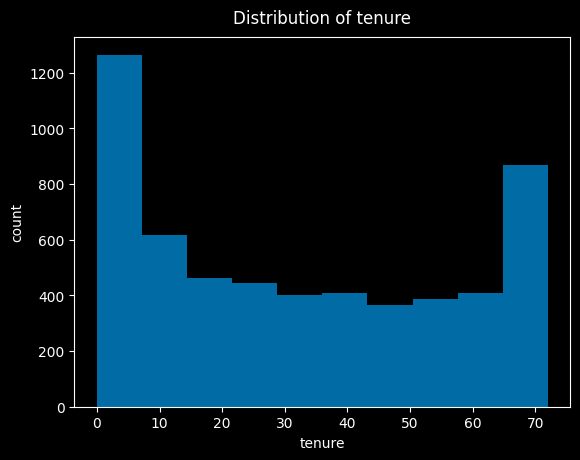

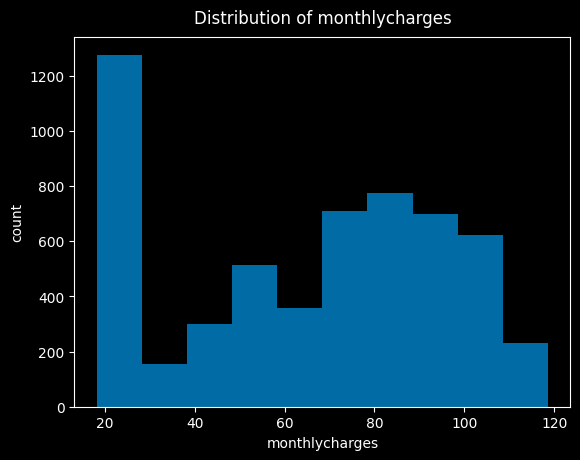

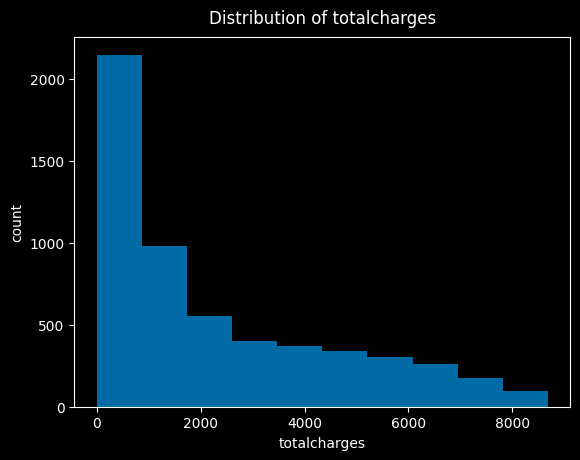

In [97]:
# Univariate analysis
for col in numeric_cols:
    plt.hist(X_full[col])
    plt.title(f"Distribution of {col}", size=12, pad=10)
    plt.xlabel(f"{col}", size=10)
    plt.ylabel("count", size=10)
    plt.show()

In [98]:
# Unique values in categorical data
for col in categorical_cols:
    print(col)
    print("Number of unique::", X_full[col].nunique())
    print(X_full[col].unique())
    print("---"*10)

gender
Number of unique:: 2
['female' 'male']
------------------------------
seniorcitizen
Number of unique:: 2
[0 1]
------------------------------
partner
Number of unique:: 2
['no' 'yes']
------------------------------
dependents
Number of unique:: 2
['yes' 'no']
------------------------------
phoneservice
Number of unique:: 2
['yes' 'no']
------------------------------
multiplelines
Number of unique:: 3
['no' 'yes' 'no_phone_service']
------------------------------
internetservice
Number of unique:: 3
['dsl' 'fiber_optic' 'no']
------------------------------
onlinesecurity
Number of unique:: 3
['yes' 'no' 'no_internet_service']
------------------------------
onlinebackup
Number of unique:: 3
['no' 'yes' 'no_internet_service']
------------------------------
deviceprotection
Number of unique:: 3
['yes' 'no' 'no_internet_service']
------------------------------
techsupport
Number of unique:: 3
['no' 'yes' 'no_internet_service']
------------------------------
streamingtv
Number of uniq

### Feature importance: Churn Rate and Risk ratio

Feature importance analysis- identifying which features affect our target variable.


**Churn Rate**

In [99]:
# Compute the churn rate by gender.
gender_churn = data.groupby(by=['gender']).mean()['churn']

# Compute the churn rate by seniorcitizen.
seniorcitizen_churn = data.groupby(by=['seniorcitizen']).mean()['churn']

# Compute the churn rate by partner.
partner_churn = data.groupby(by=['partner']).mean()['churn']

In [100]:
# data preparation
churn_rate = pd.concat([gender_churn, seniorcitizen_churn, partner_churn])
churn_rate.index = ['Female', 'Male', 'NotSCitizen', 'SCitizen', 'NoPartner', 'Partner']

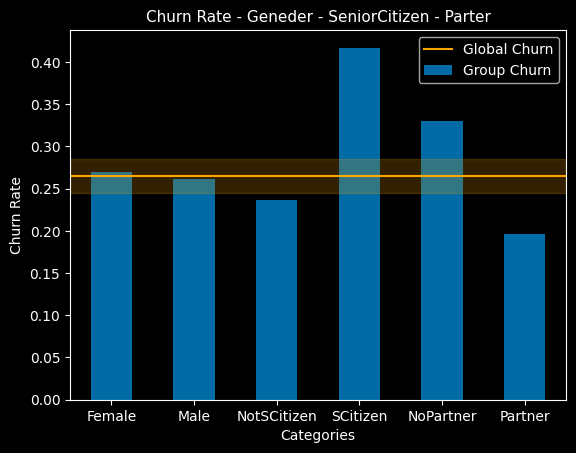

In [101]:
# plot
churn_rate.plot(kind='bar', label='Group Churn')
plt.axhspan(ymin=global_churn-0.02, ymax=global_churn+0.02, color='orange', alpha=0.2)
plt.axhline(y=global_churn, label='Global Churn', color='orange')

plt.xlabel("Categories")
plt.ylabel("Churn Rate")
plt.title("Churn Rate - Geneder - SeniorCitizen - Parter", size=11)

plt.xticks(rotation=0)
plt.legend()
plt.show()

In [102]:
from IPython.display import display

for col in categorical_cols:
    print(col)
    grp_churn = data.groupby(by=[col])['churn'].agg(func=['mean'])
    grp_churn['diff'] = grp_churn['mean'] - global_churn
    grp_churn['risk_ratio'] = grp_churn['mean'] / global_churn
    display(grp_churn)
    print()

gender


,mean,diff,risk_ratio
gender,,,
female,0.269209,0.003839,1.014466
male,0.261603,-0.003766,0.985807



seniorcitizen


,mean,diff,risk_ratio
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686



partner


,mean,diff,risk_ratio
partner,,,
no,0.329580,0.064210,1.241964
yes,0.196649,-0.068721,0.741038



dependents


,mean,diff,risk_ratio
dependents,,,
no,0.312791,0.047422,1.178700
yes,0.154502,-0.110868,0.582215



phoneservice


,mean,diff,risk_ratio
phoneservice,,,
no,0.249267,-0.016103,0.939319
yes,0.267096,0.001726,1.006506



multiplelines


,mean,diff,risk_ratio
multiplelines,,,
no,0.250442,-0.014927,0.943749
no_phone_service,0.249267,-0.016103,0.939319
yes,0.286099,0.020729,1.078114



internetservice


,mean,diff,risk_ratio
internetservice,,,
dsl,0.189591,-0.075779,0.714441
fiber_optic,0.418928,0.153558,1.578656
no,0.074050,-0.191320,0.279044



onlinesecurity


,mean,diff,risk_ratio
onlinesecurity,,,
no,0.417667,0.152297,1.573906
no_internet_service,0.074050,-0.191320,0.279044
yes,0.146112,-0.119258,0.550597



onlinebackup


,mean,diff,risk_ratio
onlinebackup,,,
no,0.399288,0.133918,1.504645
no_internet_service,0.074050,-0.191320,0.279044
yes,0.215315,-0.050055,0.811377



deviceprotection


,mean,diff,risk_ratio
deviceprotection,,,
no,0.391276,0.125906,1.474456
no_internet_service,0.074050,-0.191320,0.279044
yes,0.225021,-0.040349,0.847951



techsupport


,mean,diff,risk_ratio
techsupport,,,
no,0.416355,0.150985,1.568960
no_internet_service,0.074050,-0.191320,0.279044
yes,0.151663,-0.113706,0.571517



streamingtv


,mean,diff,risk_ratio
streamingtv,,,
no,0.335231,0.069861,1.263261
no_internet_service,0.074050,-0.191320,0.279044
yes,0.300702,0.035332,1.133143



streamingmovies


,mean,diff,risk_ratio
streamingmovies,,,
no,0.336804,0.071434,1.269188
no_internet_service,0.074050,-0.191320,0.279044
yes,0.299414,0.034044,1.128291



contract


,mean,diff,risk_ratio
contract,,,
month-to-month,0.427097,0.161727,1.609440
one_year,0.112695,-0.152675,0.424672
two_year,0.028319,-0.237051,0.106714



paperlessbilling


,mean,diff,risk_ratio
paperlessbilling,,,
no,0.163301,-0.102069,0.615371
yes,0.335651,0.070281,1.264842



paymentmethod


,mean,diff,risk_ratio
paymentmethod,,,
bank_transfer_(automatic),0.167098,-0.098271,0.629681
credit_card_(automatic),0.152431,-0.112939,0.574410
electronic_check,0.452854,0.187484,1.706502
mailed_check,0.191067,-0.074303,0.720003


### Feature Importance - Mutual Information

**Categorical Data**


In [103]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(col):
    return mutual_info_score(col, data.churn)

data[categorical_cols].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
seniorcitizen       0.010577
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

Mutual information is a measure of feature importance for categorical fetures. The above table shows feature importance score for each categorical columns for predicting customer churn in descending order. Higher the score greater the importance of feature.

### Feature Importance - Correlation
**Numerical Columns**

In [104]:
data[numeric_cols].describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [105]:
# Compute the pearson correlation with numeric columns
data[numeric_cols].corrwith(other=data['churn'])

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198324
dtype: float64

In [106]:
# Feature importance 
data[numeric_cols].corrwith(other=data['churn']).abs()

tenure            0.352229
monthlycharges    0.193356
totalcharges      0.198324
dtype: float64

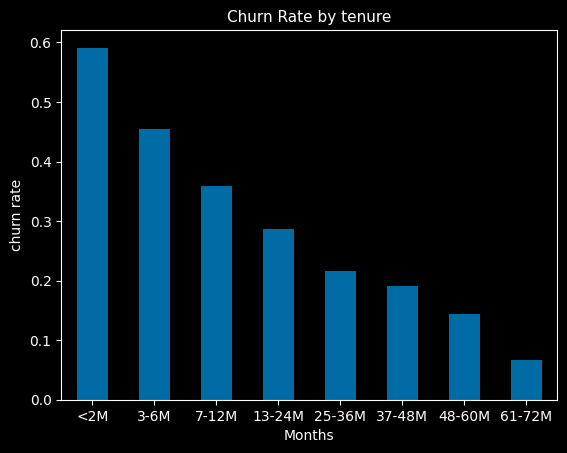

In [107]:
# Let's examine the relation of numeric variables with target variable 'churn'

# Tenture is number of months the customer has stayed with the company.
tenure  = pd.cut( x=data['tenure'], 
       bins=[0, 2, 6, 12, 24, 36, 48, 60, 72], 
       labels=['<2M', '3-6M', '7-12M', '13-24M', '25-36M', '37-48M', '48-60M', '61-72M'])

# Data preparation
tenure_df = pd.DataFrame({
    'tenure':tenure,
    'churn':data['churn']
})

# plot
tenure_df.groupby(by=['tenure'])['churn'].agg(func='mean').plot(kind='bar')
plt.title("Churn Rate by tenure", size=11)
plt.xlabel("Months", size=10)
plt.ylabel("churn rate", size=10)

plt.xticks(rotation=0)
plt.show()


We can see that the customer with more tenure is more likely to stay as their churn rate is less as compare to the churn rate of the customers with less tenure.

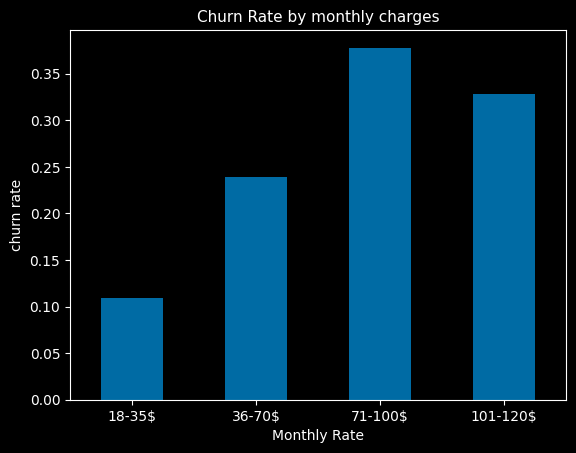

In [108]:
# Monthly Charges is the amount charged to the customer monthly.

monthlyCharge  = pd.cut( x=data['monthlycharges'], 
       bins=[18, 35, 70, 90, 120], 
       labels=['18-35$', '36-70$', '71-100$', '101-120$'])

# Data preparation
monthlyCharge_df = pd.DataFrame({
    'monthlyCharge':monthlyCharge,
    'churn':data['churn']
})

# plot
monthlyCharge_df.groupby(by=['monthlyCharge'])['churn'].agg(func='mean').plot(kind='bar')
plt.title("Churn Rate by monthly charges", size=11)
plt.xlabel("Monthly Rate", size=10)
plt.ylabel("churn rate", size=10)

plt.xticks(rotation=0)
plt.show()


As the monthly charges increases the churn rate is also increases.

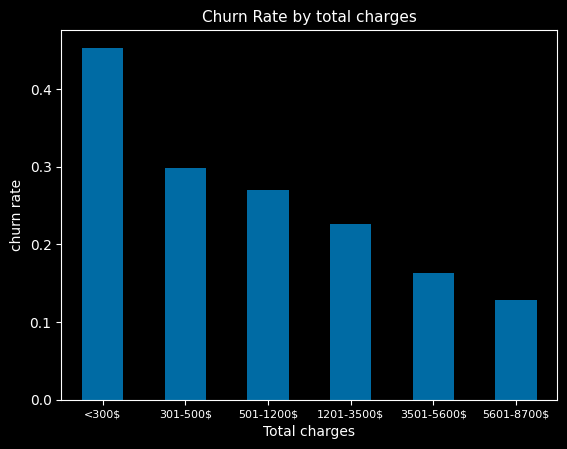

In [109]:
# Total Charges is the total amount charged to the customer.

totalCharge  = pd.cut( x=data['totalcharges'],
                    bins=[0, 300, 500, 1200, 3500, 5600, 8700], 
                    labels=['<300$', '301-500$', '501-1200$', '1201-3500$', '3501-5600$', '5601-8700$'])

# Data preparation
totalCharge_df = pd.DataFrame({
    'totalCharge':totalCharge,
    'churn':data['churn']
})

# plot
totalCharge_df.groupby(by=['totalCharge'])['churn'].agg(func='mean').plot(kind='bar')
plt.title("Churn Rate by total charges", size=11)
plt.xlabel("Total charges", size=10)
plt.ylabel("churn rate", size=10)

plt.xticks(rotation=0, size=8)
plt.show()


From the plots, we can say that higher the total charges the customers likely to stay.

## One-Hot Encoding

In [110]:
# one hot encoding using sklearn.
from sklearn.feature_extraction import DictVectorizer

# Initialize the dictionary vectorizer.
dv = DictVectorizer(sparse=False)

In [111]:
# Convert the data into dictionary object
train_dict = X_train[categorical_cols + numeric_cols].to_dict(orient='records')
val_dict = X_val[categorical_cols + numeric_cols].to_dict(orient='records')
test_dict = X_test[categorical_cols + numeric_cols].to_dict(orient='records')

# fit and transform the data into 0's and 1's
X_transform_train = dv.fit_transform(train_dict)
X_transform_val = dv.transform(val_dict)
X_transform_test = dv.transform(test_dict)


## Training Logistic Regression with Scikit-Learn
We will trained a model using `LogisticRegression` of `Scikit-learn` library on training data and validate the accuracy of the model using validation dataset.

In [112]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_transform_train, y_train)

# make predictions on validation
y_preds = model.predict_proba(X_transform_val)

# on training data
y_train_preds = model.predict_proba(X_transform_train)

# select only probability of 1 or churn.
y_preds = y_preds[:, 1]
y_train_preds = y_train_preds[:, 1]

In [113]:
# Create a threshold
threshold = 0.6

# accuracy - total predicted positive / total actual positive
print("Accuracy - ")
print("Training dataset::", (y_train == (y_train_preds >= threshold)).mean())
print("validation dataset::", (y_val == (y_preds >= threshold)).mean())

Accuracy - 
Training dataset:: 0.7983431952662722
validation dataset:: 0.7899219304471257


### Model Coefficients

In [114]:
# coefficients
# bias term
w0 = model.intercept_[0] 

# Coefficient of each feature
w  = model.coef_[0]

In [115]:
# Features with its corresponding coefficient values
dict(zip(dv.get_feature_names(), w))

d:\ML-BootCamp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.6546896549095884,
 'contract=one_year': -0.1669684475498409,
 'contract=two_year': -0.6297088850779773,
 'dependents=no': -0.03619769330827229,
 'dependents=yes': -0.10578998440301524,
 'deviceprotection=no': 0.027582331008625987,
 'deviceprotection=no_internet_service': -0.12693278095030436,
 'deviceprotection=yes': -0.04263722776936849,
 'gender=female': 0.01826170844574034,
 'gender=male': -0.16024938615609718,
 'internetservice=dsl': -0.33569128190443587,
 'internetservice=fiber_optic': 0.32063638514298626,
 'internetservice=no': -0.12693278095030436,
 'monthlycharges': 0.0018738176654762215,
 'multiplelines=no': -0.22563051571856965,
 'multiplelines=no_phone_service': 0.12820797145222876,
 'multiplelines=yes': -0.044565133445193514,
 'onlinebackup=no': 0.07294105377796307,
 'onlinebackup=no_internet_service': -0.12693278095030436,
 'onlinebackup=yes': -0.08799595053984209,
 'onlinesecurity=no': 0.20313578243640254,
 'onlinesecurity=no_internet_service

In [116]:
# Let's trained a model with selected features
from typing import Dict


features = ['seniorcitizen', 'partner', 'dependents', 'tenure', 
            'phoneservice', 'contract', 'monthlycharges', 'totalcharges']

df_train = X_full[features].copy().reset_index(drop=True)
df_test = X_test[features].copy().reset_index(drop=True)

y_full_train = y_full.reset_index(drop=True)

# One hot encoding using 'DictVectorizer' method.
dv = DictVectorizer(sparse=False)

# convert data into dictionary
df_train_dict = df_train.to_dict(orient='records')
df_test_dict = df_test.to_dict(orient='records')

df_transform_train = dv.fit_transform(df_train_dict)
df_transform_test = dv.transform(df_test_dict)


In [117]:
# fit data
model.fit(df_transform_train, y_full_train)
y_predictions = model.predict_proba(df_transform_test)[:, 1]

print("Accuracy::", (y_test == (y_predictions >= threshold)).mean())

Accuracy:: 0.7920511000709723


In [118]:
# Coeffiencts.
dict(zip(dv.get_feature_names(), model.coef_[0]))

d:\ML-BootCamp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.702699842208338,
 'contract=one_year': -0.3916797076544196,
 'contract=two_year': -1.0485580518477717,
 'dependents=no': -0.2657869855507664,
 'dependents=yes': -0.47175093165714793,
 'monthlycharges': 0.026456288797191967,
 'partner=no': -0.3551768232361264,
 'partner=yes': -0.38236109396653595,
 'phoneservice=no': 0.1322506298289869,
 'phoneservice=yes': -0.8697885470084818,
 'seniorcitizen': 0.340904387000745,
 'tenure': -0.05690514168599549,
 'totalcharges': 0.0002458090456924583}

# How to use model

In [119]:
# Let's select the random customer from the test data.
idx = np.random.randint(0, 1409)
customer = df_test_dict[idx]
customer = dv.transform(customer)

# predict the whether this customer churn or not using model
prediction = model.predict_proba(customer)[:, 1][0]
customer_choice = 'Yes' if (prediction >= 0.5) else 'No'
print("Will customer churn::", customer_choice)

Will customer churn:: No
